# Task 02 — Linear Regression: House Price Prediction (Python)




Description:

In this project, you will predict the price of a house using various features like example number of rooms, size of the house, location and age of the house etc.

The goal is to use Linear Regression in Python to build a model that learns the relationship between these features and house prices.

Learning skills: Learning of regression analysis, Python, Scikit learn library.

Goal. Predict house prices from numeric and categorical features using a scikit-learn pipeline.

Load the dataset, Understand the data (EDA), Handle missing values, Explore relationships between features and SalePrice, Build a simple prediction model, Improve the model.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sns.set (style="whitegrid")

1. Load the dataset
Load the train.csv file, which contains both the features (house details) and the target variable (SalePrice).

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.shape

df.shape → (1460, 81)

1460 rows → each row is one house.

81 columns → each column is a feature (like LotArea, YearBuilt) or the target (SalePrice).

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Each row = a house column = a feature about the house Features can be: Numeric (LotArea = 8450, a number). Categorical (MSZoning = RL, a label). Missing (NaN = data not available). Target variable = SalePrice This is the column we’re trying to predict.

The other 80 columns are the inputs to help predict it. Machine Learning’s job Learn patterns between features (like LotArea, OverallQual, YearBuilt) and the target SalePrice. Example: bigger lot → usually higher price, better quality rating → higher price.

House Prices dataset has 3 files:

train.csv → has features + SalePrice (target). Used for training/validation.

test.csv → has features only (no SalePrice). Used for submission predictions.

sample_submission.csv → shows the format you must submit: Id,SalePrice.

So workflow is:

Apply EDA + preprocessing + feature engineering only on train.csv.

Train and validate models using the train.csv data.

Once final model is ready → fit it on all of train.csv.

Apply same preprocessing + feature engineering steps to test.csv.

Predict SalePrice for test.csv.

Reverse log transform (since we log1p-ed target):

2. Explore the dataset (EDA)

This is to check:
Number of rows and columns
Data types
Missing values
Basic statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

RangeIndex: 1460 entries, 0 to 1459
→ The dataset has 1460 houses (rows).
Data columns (total 81 columns)→ Each house has 81 details (features).
Column types
int64 → whole numbers (e.g. number of rooms, year built).
float64 → decimals (e.g. lot frontage in feet, masonry veneer area).
object → text data (e.g. neighborhood name, zoning, street type).
Example:
LotArea → int64, area of the lot in square feet.
MSZoning → object, type of zoning (RL = residential low density).
SalePrice → int64, the target we want to predict.
Missing values (Non-Null Count)
LotFrontage 1201 non-null out of 1460 → about 259 missing values.
Alley 91 non-null → almost all missing (1369 missing).
PoolQC 7 non-null → practically empty.
FireplaceQu 770 non-null → about half missing.

In [6]:
df.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0


Each row is a statistic, and each column is one of dataset’s numeric features.
1. count
Example: LotFrontage → 1201.000000
Meaning: Only 1201 houses have this value (others are missing).
Why important: Helps spot missing data.
2. mean
Example: LotArea → 10516.8
Meaning: The average lot (land) size is about 10,516 square feet.
Why important: Gives a sense of the "center" of the data.
3. std (standard deviation)
Example: SalePrice → 79,442
Meaning: Prices are spread widely around the mean. Some houses are much cheaper,
some much more expensive.
Why important: Shows variability. High std = data is very spread out.
4. min
Example: YearBuilt → 1872
Meaning: The oldest house was built in 1872.
Why important: Shows the lower extreme in the dataset.
5. 25% (first quartile, Q1)
Example: OverallQual → 5.0
Meaning: 25% of houses have an overall quality ≤ 5.
Why important: Splits the data into four equal parts.
6. 50% (median, Q2)
Example: SalePrice → 163,000
Meaning: Half of the houses cost less than 163k, half cost more.
Why important: More robust than mean (not affected by very expensive houses).
7. 75% (third quartile, Q3)
Example: LotArea → 11,601.5
Meaning: 75% of houses have lot area ≤ 11,601, and 25% have bigger land.
Why important: Helps see where the “upper” bulk of the data lies.
8. max
Example: SalePrice → 755,000
Meaning: The most expensive house sold for $755k.
Why important: Spots outliers (extreme values).

Missing Values
Check for columns with missing data.

In [7]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64

PoolQC (pool quality) is missing in 1453 houses out of 1460 — almost nobody has a pool!
Alley is missing in 1369 houses — meaning most don’t have an alley.
Fence missing in 1179 houses — many houses don’t have fences.
LotFrontage has 259 missing — here we might need to fill values.
Some features like Garage have 81 missing (probably houses without a garage).
Electrical has only 1 missing — easy to fix.
Condition2 has 0 missing — perfect data.

Columns with too many missing values (like PoolQC, Alley, Fence) may not be useful for prediction. Ist best to drop them.

##Drop columns with too many missing values

In [8]:
# Drop columns with too many missing values
df = df.drop(columns=["PoolQC", "MiscFeature", "Alley", "Fence"])

# Fill categorical NaNs with "None"
for col in ["GarageType", "GarageFinish", "GarageQual", "GarageCond",
            "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
            "MasVnrType"]:
    df[col] = df[col].fillna("None")

# Fill numeric NaNs with median
for col in ["LotFrontage", "GarageYrBlt", "MasVnrArea"]:
    df[col] = df[col].fillna(df[col].median())

# Fill Electrical with mode
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])

# Verify no missing values remain
print(df.isnull().sum().sort_values(ascending=False).head(10))

FireplaceQu    690
MSSubClass       0
MSZoning         0
LotFrontage      0
Id               0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
dtype: int64


A number greater than 0 = that many missing values remain.
A 0 = clean column, no missing data.

Univariate Analysis;

Look at the target (SalePrice) distribution.
Explore each feature individually (numeric + categorical).
Spot missing values, skewness, and outliers.

This step makes sure you understand your data’s shape before comparing.

Bivariate Analysis (second)
Compare each feature against SalePrice.
Numeric → scatterplots & correlation heatmap.
Categorical → boxplots or violin plots vs SalePrice.

This step tells you which features are useful for prediction.

Feature Engineering
Fix missing values.
Handle skewness (log transform SalePrice, etc.).
Create new features (e.g., total area = basement + living area).
Model Building & Evaluation
Split into train/test.

Try baseline model (Linear Regression).
Evaluate with RMSE, R².
Improve with advanced models (Random Forest, XGBoost).

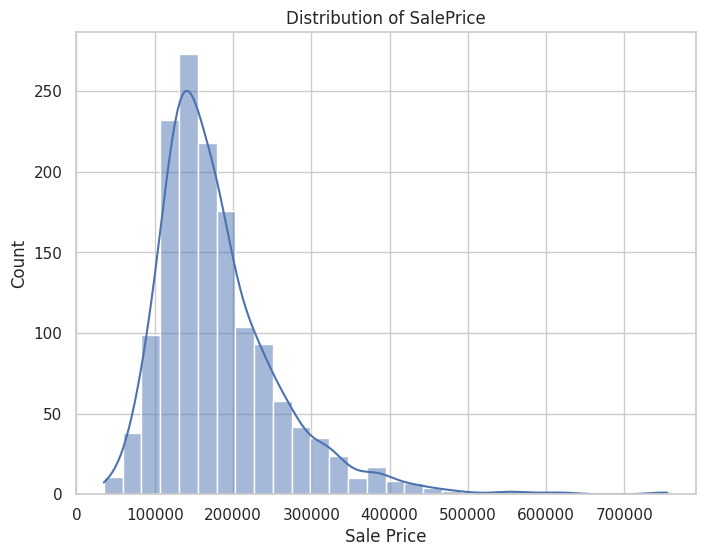

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title("Distribution of SalePrice")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.show()

This shows how house prices are distributed.
Most houses fall in a central range, but you may see a long right tail (skewness).
If very skewed, we might need a log transform later.

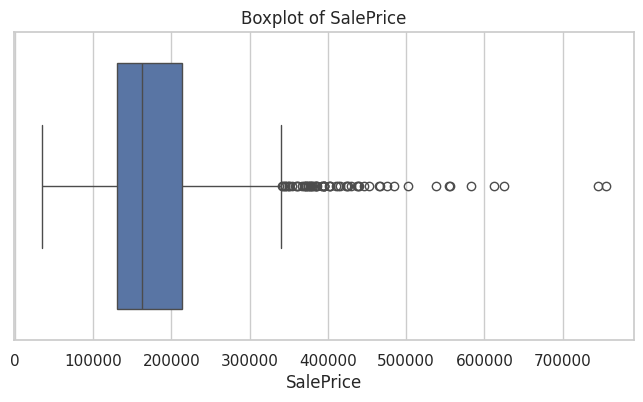

In [10]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['SalePrice'])
plt.title("Boxplot of SalePrice")
plt.show()

Shows spread + potential outliers (very expensive houses).
Outliers can heavily affect models like Linear Regression.

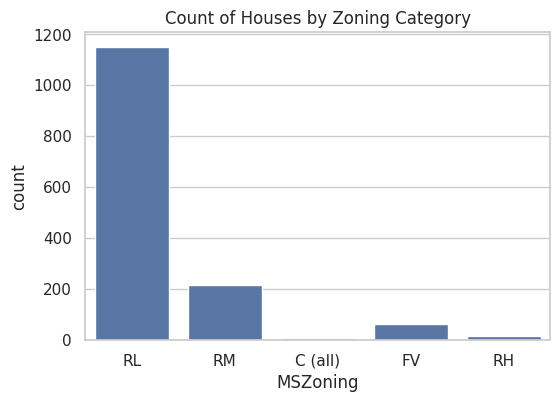

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['MSZoning'])
plt.title("Count of Houses by Zoning Category")
plt.show()

Shows how many houses fall into each zoning category.
Helps us detect imbalances (e.g., most houses may belong to "RL").

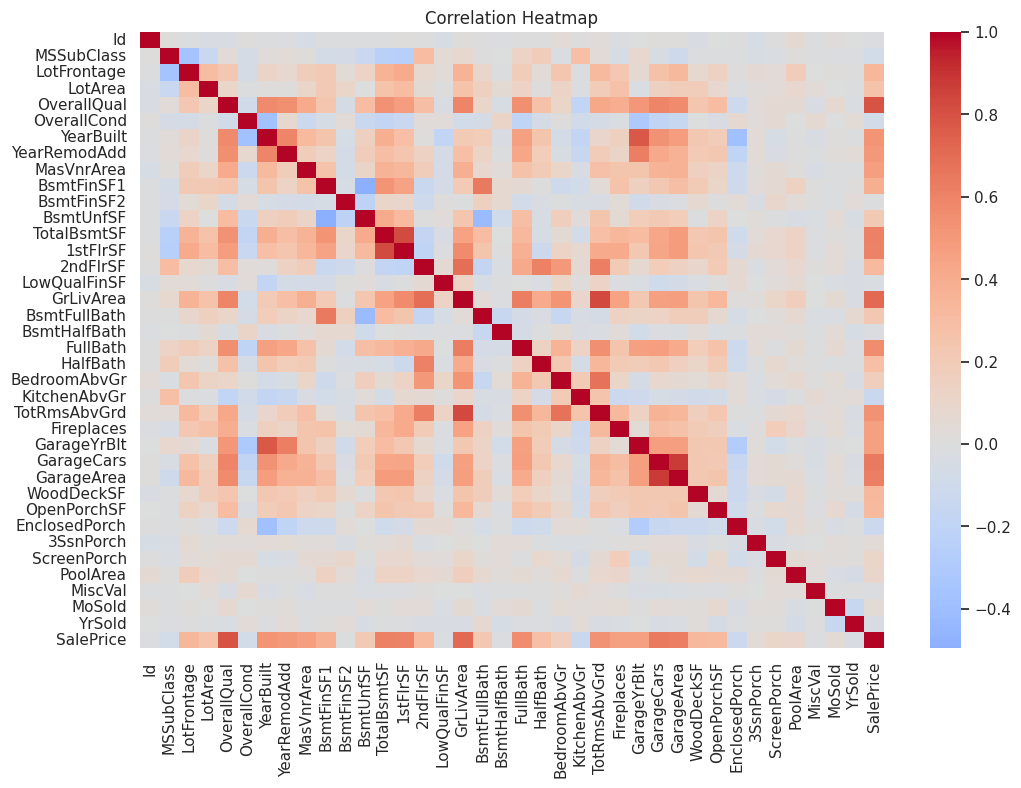

In [12]:
##Bivariate Analysis

#Compare features against SalePrice (target). This shows relationships and predictive power.


plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)  # only numeric columns
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

Correlation ranges from -1 to +1.
+1 → strong positive (as feature ↑, price ↑).
-1 → strong negative (as feature ↑, price ↓).
0 → no linear relationship.

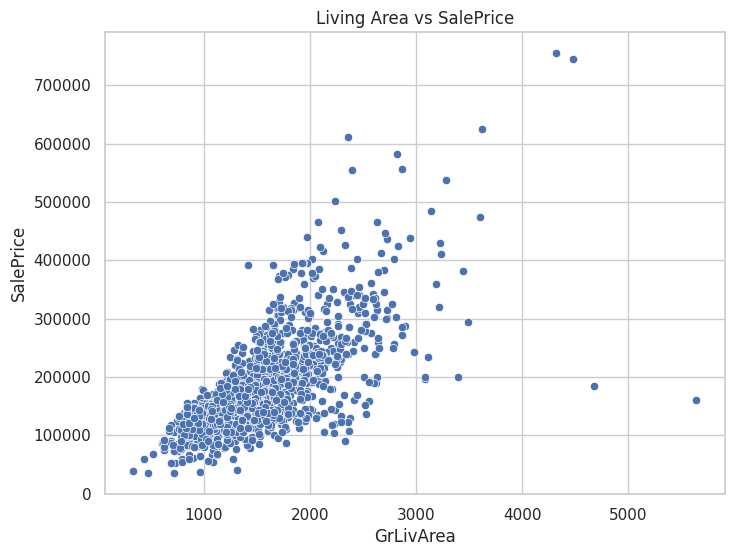

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title("Living Area vs SalePrice")
plt.show()

Each dot = one house.
Bigger houses (GrLivArea) → usually higher prices.
Watch for outliers: huge houses with low prices.

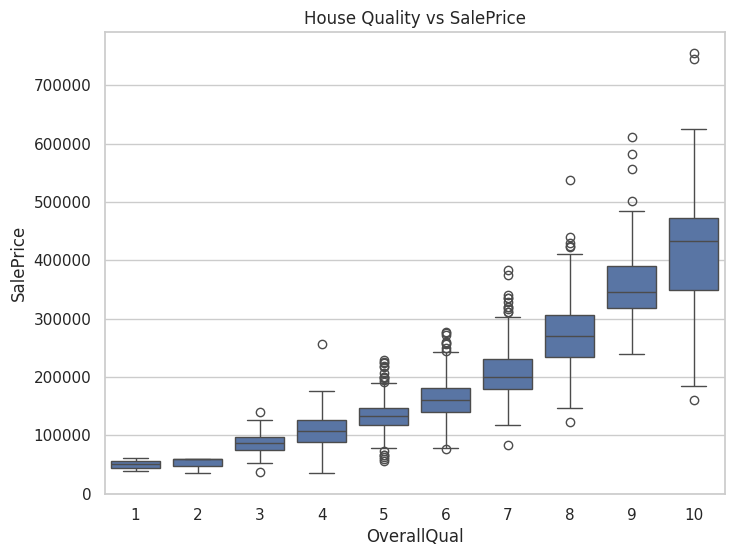

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['OverallQual'], y=df['SalePrice'])
plt.title("House Quality vs SalePrice")
plt.show()

OverallQual is an ordinal rating (1–10).
Higher quality → higher sale price.
Shows clear upward trend.

Univariate → understand each variable separately.
SalePrice distribution → skewness & outliers.
Boxplots → highlight extreme values.
Countplots → category balance.

Bivariate → check feature vs SalePrice.
Heatmap → numeric correlations.
Scatterplots → relationships + outliers.
Boxplots → how categories relate to SalePrice

# Baseline Model: Linear Regression with Preprocessing

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# --- Step 1: Load raw data ---
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Separate features/target
X = train.drop(["SalePrice", "Id"], axis=1).copy()
y = np.log1p(train["SalePrice"]).copy()   # log-transform target

# Save test Ids for submission
test_ids = test["Id"]
X_test_final = test.drop("Id", axis=1).copy()

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 2: Identify numeric & categorical columns ---
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

# --- Step 3: Pipelines for preprocessing ---
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

# --- Step 4: Build Linear Regression pipeline ---
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# --- Step 5: Cross-validation ---
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring="r2")
print("Cross-validation R² scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())

# --- Step 6: Validation check ---
pipeline.fit(X_train, y_train)
y_val_pred = pipeline.predict(X_val)

val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)
print(f"Validation RMSE (log-target): {val_rmse:.4f}, R²: {val_r2:.4f}")

# --- Step 7: Final test predictions ---
test_preds = np.expm1(pipeline.predict(X_test_final))   # reverse log-transform

submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": test_preds
})
submission.to_csv("submission.csv", index=False)
print("Submission file created: submission.csv")

# --- Step 8: Save model ---
joblib.dump(pipeline, "linear_regression_baseline.pkl")
print(" Model pipeline saved: linear_regression_baseline.pkl")


Cross-validation R² scores: [0.87432107 0.84999982 0.83135763 0.91453926 0.73525987]
Mean CV R²: 0.8410955304135962
Validation RMSE (log-target): 0.1281, R²: 0.9121
Submission file created: submission.csv
 Model pipeline saved: linear_regression_baseline.pkl


Tools for Building & Testing Models

joblib → Save & load models to disk so you don’t retrain every time.
train_test_split → Splits data into training (to learn) and test/validation (to check performance).
cross_val_score → Runs cross-validation, testing the model on multiple folds to check reliability.

Preprocessing Pipelines
Pipeline → Chains steps (e.g., impute missing → scale → train model) into one object.
ColumnTransformer → Lets you apply different preprocessing to numeric and categorical features in one go.
Common Transformers
SimpleImputer → Fills in missing values.
Example: replace missing numbers with the median.
StandardScaler → Standardizes numeric features (mean = 0, std = 1).
OneHotEncoder → Converts categories (like "A", "B", "C") into binary 0/1 columns.
Models

LinearRegression → A basic regression model that learns a straight-line relationship between features and target.
Evaluation Metrics
mean_squared_error (MSE) → Average of squared errors (penalizes large mistakes).
mean_absolute_error (MAE) → Average of absolute errors (easier to interpret).
r2_score (R²) → How much variation the model explains (1.0 = perfect fit).

# Feature Engineering

In [16]:
import pandas as pd
import numpy as np

def feature_engineering(df):
    df = df.copy()

    # ----- 1. Create new features -----
    df["TotalSF"] = df["1stFlrSF"] + df["2ndFlrSF"] + df["TotalBsmtSF"]
    df["TotalBath"] = (df["FullBath"] + 0.5*df["HalfBath"] + 
                       df["BsmtFullBath"] + 0.5*df["BsmtHalfBath"])
    df["PorchArea"] = (df["OpenPorchSF"] + df["EnclosedPorch"] + 
                       df["3SsnPorch"] + df["ScreenPorch"])

    # ----- 2. Encode ordinal quality features -----
    qual_mapping = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, np.nan:0}
    ordinal_cols = ["ExterQual", "KitchenQual", "BsmtQual", 
                    "HeatingQC", "FireplaceQu", "GarageQual"]
    for col in ordinal_cols:
        if col in df.columns:
            df[col] = df[col].map(qual_mapping)

    # ----- 3. Handle skewed numeric features -----
    numeric_feats = df.select_dtypes(include=["int64","float64"])
    skewness = numeric_feats.apply(lambda x: x.dropna().skew()).sort_values(ascending=False)
    skewed_cols = skewness[skewness > 0.75].index
    df[skewed_cols] = np.log1p(df[skewed_cols])

    return df
# Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Apply feature engineering
train_fe = feature_engineering(train)
test_fe = feature_engineering(test)

# Log-transform SalePrice only in train
y = np.log1p(train_fe["SalePrice"])
X = train_fe.drop("SalePrice", axis=1)

# Keep test features ready
X_test_final = test_fe


Key Points:

Both train and test go through the same feature engineering function.

Only the train set’s SalePrice gets log-transformed.

# Split + Preprocessing Pipelines

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# --- Step 0: Load data ---
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Save test IDs separately
test_id = test["Id"].copy()

# Drop Id from train and test
train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)

# --- Step 1: Separate target & features ---
y = np.log1p(train["SalePrice"])   # log-transform SalePrice
X = train.drop("SalePrice", axis=1)

# --- Step 2: Train/validation split ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 3: Identify numeric & categorical columns ---
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

# --- Step 4: Preprocessing pipelines ---
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

# --- Step 5: Build Linear Regression pipeline ---
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# --- Step 6: Cross-validation ---
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring="r2")
print("Cross-validation R² scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())

# --- Step 7: Fit & validate ---
pipeline.fit(X_train, y_train)
y_val_pred = pipeline.predict(X_val)

val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation RMSE (log-target): {val_rmse:.4f}, R²: {val_r2:.4f}")

# --- Step 8: Final predictions on test set ---
test_preds = np.expm1(pipeline.predict(test))  # reverse log1p

submission = pd.DataFrame({
    "Id": test_id,
    "SalePrice": test_preds
})
submission.to_csv("submission.csv", index=False)
print("Submission file created: submission.csv")

# --- Step 9: Save model ---
joblib.dump(pipeline, "linear_regression_pipeline.pkl")
print("Model pipeline saved: linear_regression_pipeline.pkl")


Cross-validation R² scores: [0.87432107 0.84999982 0.83135763 0.91453926 0.73525987]
Mean CV R²: 0.8410955304135962
Validation RMSE (log-target): 0.1281, R²: 0.9121
Submission file created: submission.csv
Model pipeline saved: linear_regression_pipeline.pkl


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# --- Step 1: Split train/validation ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 2: Identify numeric & categorical columns ---
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

# --- Step 3: Pipelines ---
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# Combine numeric + categorical preprocessing
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

# --- Apply preprocessing on train & validation sets ---
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)

# Convert the transformed arrays back into a DataFrame
# (so you can see columns instead of just numbers)
# First, get the names of all transformed features:
cat_feature_names = preprocessor.named_transformers_["cat"]["onehot"].get_feature_names_out(cat_cols)
all_feature_names = num_cols + cat_feature_names.tolist()

# Wrap in a DataFrame
X_train_df = pd.DataFrame(X_train_processed, columns=all_feature_names, index=X_train.index)
X_val_df = pd.DataFrame(X_val_processed, columns=all_feature_names, index=X_val.index)

# Print shapes
print("Original train shape:", X_train.shape)
print("Transformed train shape:", X_train_df.shape)

# Show a preview
print(X_train_df.head())



Original train shape: (1168, 79)
Transformed train shape: (1168, 285)
      MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
254    -0.866764    -0.012468 -0.212896    -0.820445     0.372217  -0.455469   
1066    0.074110    -0.502357 -0.265245    -0.088934     1.268609   0.718609   
638    -0.631546    -0.146074 -0.177841    -0.820445     1.268609  -1.988293   
799    -0.161109    -0.457822 -0.324474    -0.820445     1.268609  -1.107734   
380    -0.161109    -0.903175 -0.529035    -0.820445     0.372217  -1.531707   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
254      -1.346063   -0.597889    1.037269   -0.285504  ...             0.0   
1066      0.439214   -0.597889   -0.971996   -0.285504  ...             0.0   
638      -1.683818   -0.597889   -0.971996   -0.285504  ...             0.0   
799      -1.683818    0.861522    0.267995   -0.285504  ...             0.0   
380      -1.683818   -0.597889   -0.496920   -0.285504

# Linear Regression Pipeline (with Evaluation + Test Predictions)

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# --- Step 1: Read CSV ---
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Keep test IDs safe
test_ids = test["Id"].copy()

# Drop Id from both sets
train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)

# Separate target from features
y = train["SalePrice"]
X = train.drop("SalePrice", axis=1)

# --- Step 1b: Train/validation split ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 2: Numeric & categorical columns ---
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

# --- Step 3: Pipelines ---
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

# --- Step 4: Build Linear Regression pipeline ---
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# --- Step 5: Cross-validation (R² scores) ---
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring="r2")
print("Cross-validation R² scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())

# --- Step 6: Fit & validate ---
pipeline.fit(X_train, y_train)
y_val_pred = pipeline.predict(X_val)

val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation RMSE: {val_rmse:.4f}, R²: {val_r2:.4f}")

# --- Step 7: Final predictions on test set ---
X_test_final = test.copy()  # FIX: use test, not undefined 'test_fe'

# FIX: Ensure test has same columns as training
missing_cols = set(X_train.columns) - set(X_test_final.columns)
for c in missing_cols:
    X_test_final[c] = 0  # numeric default, imputer can handle NaNs

# Reorder columns to match X_train
X_test_final = X_test_final[X_train.columns]

# Predict (FIX: remove np.expm1, only needed if y was log-transformed)
test_preds = pipeline.predict(X_test_final)

# Create submission
submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": test_preds
})
submission.to_csv("submission.csv", index=False)
print("Submission file created: submission.csv")

# --- Step 8: Save model ---
joblib.dump(pipeline, "linear_regression_pipeline.pkl")
print("Model pipeline saved: linear_regression_pipeline.pkl")


Cross-validation R² scores: [0.81817011 0.82298476 0.80271994 0.88793649 0.6423406 ]
Mean CV R²: 0.7948303803051295
Validation RMSE: 29475.5248, R²: 0.8867
Submission file created: submission.csv
Model pipeline saved: linear_regression_pipeline.pkl


Splits training into train/validation.

Builds preprocessing for numeric & categorical features.

Trains a Linear Regression model.

Reports:

Cross-validation R²

Validation RMSE (log-target)

Predicts test set & saves submission.csv.

Saves trained pipeline as linear_regression_pipeline.pkl.

# Ridge Regression

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# --- Step 0: Read CSV ---
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Keep test IDs safe
test_ids = test["Id"].copy()

# Drop 'Id' from both sets
train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)

# Separate target and features
y = train["SalePrice"]
X = train.drop("SalePrice", axis=1)

# --- Step 1: Train/validation split ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 2: Numeric & categorical columns ---
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

# --- Step 3: Pipelines ---
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

# --- Step 4: Ridge pipeline ---
ridge = Ridge(alpha=10, random_state=42)

ridge_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", ridge)
])

# --- Step 5: Cross-validation (RMSE) ---
# Use negative RMSE scoring
ridge_cv_scores = -cross_val_score(
    ridge_pipeline, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error"
)
print("Ridge CV RMSE:", ridge_cv_scores.mean())

# --- Step 6: Fit on training data ---
ridge_pipeline.fit(X_train, y_train)

# --- Step 7: Validation performance ---
y_val_pred_ridge = ridge_pipeline.predict(X_val)
ridge_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_ridge))
ridge_r2 = r2_score(y_val, y_val_pred_ridge)
print(f"Ridge Validation RMSE: {ridge_rmse:.4f}, R²: {ridge_r2:.4f}")

# --- Step 8: Prepare test set for prediction ---
X_test_final = test.copy()  # use test DataFrame

# Ensure test columns match training columns
missing_cols = set(X_train.columns) - set(X_test_final.columns)
for c in missing_cols:
    X_test_final[c] = 0  # or np.nan, SimpleImputer will handle it

# Reorder columns to match training
X_test_final = X_test_final[X_train.columns]

# --- Step 9: Predict on test set ---
ridge_test_preds = ridge_pipeline.predict(X_test_final)

# --- Step 10: Create submission ---
ridge_submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": ridge_test_preds
})
ridge_submission.to_csv("ridge_submission.csv", index=False)
print("Ridge submission saved!")

# --- Step 11: Save Ridge model pipeline ---
joblib.dump(ridge_pipeline, "ridge_pipeline.pkl")
print("Ridge model pipeline saved!")


Ridge CV RMSE: 32571.475873032563
Ridge Validation RMSE: 30642.2012, R²: 0.8776
Ridge submission saved!
Ridge model pipeline saved!


# Lasso Regression

In [21]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# --- Step 1: Build Lasso pipeline ---
lasso = Lasso(alpha=0.001, random_state=42, max_iter=10000)
lasso_pipeline = Pipeline([
    ("preprocessor", preprocessor),  # reuse your preprocessor from previous code
    ("model", lasso)
])

# --- Step 2: Fit on training data ---
lasso_pipeline.fit(X_train, y_train)

# --- Step 3: Validation performance ---
y_val_pred = lasso_pipeline.predict(X_val)

# FIX: Compute RMSE manually without `squared` argument
lasso_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
lasso_r2 = r2_score(y_val, y_val_pred)

print(f"Lasso RMSE: {lasso_rmse:.4f}, R²: {lasso_r2:.4f}")

# --- Step 4: Prepare test set for prediction ---
X_test_final = test.copy()

# Ensure test columns match training columns
missing_cols = set(X_train.columns) - set(X_test_final.columns)
for c in missing_cols:
    X_test_final[c] = 0  # or np.nan, SimpleImputer will handle it

# Reorder columns to match training
X_test_final = X_test_final[X_train.columns]

# --- Step 5: Predict on test set ---
lasso_test_preds = lasso_pipeline.predict(X_test_final)

# --- Step 6: Create submission ---
lasso_submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": lasso_test_preds
})
lasso_submission.to_csv("lasso_submission.csv", index=False)
print("Lasso submission saved!")

# --- Step 7: Save Lasso model pipeline ---
import joblib
joblib.dump(lasso_pipeline, "lasso_pipeline.pkl")
print("Lasso model pipeline saved!")


Lasso RMSE: 28328.8553, R²: 0.8954
Lasso submission saved!
Lasso model pipeline saved!


/home/nafkem/DS/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.437e+10, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


# Random Forest

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# --- Step 0: Read data ---
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Keep test IDs
test_ids = test["Id"].copy()

# Drop Id
train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)

# Separate target
y = train["SalePrice"]
X = train.drop("SalePrice", axis=1)

# --- Step 1: Train/validation split ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 2: Preprocessing ---
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

# --- Step 3: Random Forest pipeline ---
rf = RandomForestRegressor(
    n_estimators=500, max_depth=None, random_state=42, n_jobs=-1
)
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", rf)
])

# Fit and validate
rf_pipeline.fit(X_train, y_train)
y_val_pred_rf = rf_pipeline.predict(X_val)
rf_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))
rf_r2 = r2_score(y_val, y_val_pred_rf)
print(f"Random Forest RMSE: {rf_rmse:.4f}, R²: {rf_r2:.4f}")

# --- Step 4: Prepare test set ---
X_test_final = test.copy()
missing_cols = set(X_train.columns) - set(X_test_final.columns)
for c in missing_cols:
    X_test_final[c] = 0
X_test_final = X_test_final[X_train.columns]

# Predict test
rf_test_preds = rf_pipeline.predict(X_test_final)

# Submission
rf_submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": rf_test_preds
})
rf_submission.to_csv("rf_submission.csv", index=False)
print("Random Forest submission saved!")

# Save pipeline
joblib.dump(rf_pipeline, "rf_pipeline.pkl")
print("Random Forest pipeline saved!")


Random Forest RMSE: 28613.6350, R²: 0.8933
Random Forest submission saved!
Random Forest pipeline saved!


# XGBoost

# combined script with Linear Regression, Ridge, Lasso, Random Forest, and XGBoost

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Optional: XGBoost
try:
    from xgboost import XGBRegressor
    xgb_installed = True
except ModuleNotFoundError:
    print("XGBoost not installed. Skipping XGBoost.")
    xgb_installed = False

# --- Step 0: Read data ---
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_ids = test["Id"].copy()

train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)

y = train["SalePrice"]
X = train.drop("SalePrice", axis=1)

# --- Step 1: Train/validation split ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 2: Preprocessing ---
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

# --- Step 3: Models ---
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=10, random_state=42),
    "Lasso": Lasso(alpha=0.001, random_state=42, max_iter=10000),
    "RandomForest": RandomForestRegressor(n_estimators=500, max_depth=None, random_state=42, n_jobs=-1)
}

if xgb_installed:
    models["XGBoost"] = XGBRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )

# --- Step 4: Train, evaluate, and save each model ---
for name, model in models.items():
    print(f"\n{name} training...")
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Fit
    pipeline.fit(X_train, y_train)
    
    # Validation
    y_val_pred = pipeline.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2 = r2_score(y_val, y_val_pred)
    print(f"{name} Validation RMSE: {rmse:.4f}, R²: {r2:.4f}")
    
    # Prepare test set
    X_test_final = test.copy()
    missing_cols = set(X_train.columns) - set(X_test_final.columns)
    for c in missing_cols:
        X_test_final[c] = 0
    X_test_final = X_test_final[X_train.columns]
    
    # Predict test
    test_preds = pipeline.predict(X_test_final)
    
    # Save submission
    submission = pd.DataFrame({
        "Id": test_ids,
        "SalePrice": test_preds
    })
    submission.to_csv(f"{name}_submission.csv", index=False)
    print(f"{name} submission saved!")

    # Save model
    joblib.dump(pipeline, f"{name}_pipeline.pkl")
    print(f"{name} pipeline saved!")


XGBoost not installed. Skipping XGBoost.

LinearRegression training...
LinearRegression Validation RMSE: 29475.5248, R²: 0.8867
LinearRegression submission saved!
LinearRegression pipeline saved!

Ridge training...
Ridge Validation RMSE: 30642.2012, R²: 0.8776
Ridge submission saved!
Ridge pipeline saved!

Lasso training...


/home/nafkem/DS/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.437e+10, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


Lasso Validation RMSE: 28328.8553, R²: 0.8954
Lasso submission saved!
Lasso pipeline saved!

RandomForest training...
RandomForest Validation RMSE: 28613.6350, R²: 0.8933
RandomForest submission saved!
RandomForest pipeline saved!


In [ ]:
# submission = pd.DataFrame({
#     "Id": test["Id"],
#     "SalePrice": test_preds_exp
# })
# submission.to_csv("submission.csv", index=False)
# print("submission.csv created!")
